<h2>Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.</h2>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<h3>The dataset comes from the UCI Machine Learning repository, and it is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y).</h3>

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


<h3>From the above we can see that minimum agae of particpiation in this campaign is 17 while the maximum age is 98.</h3>


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

<b>From the above information we can infer that we have 21 columns with 41,188 rows</b>

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

<b>It seems the null values have been handeled in this dataset and thus there is no null value in any of the column</b>

In [8]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

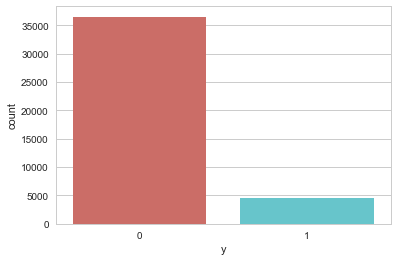

In [9]:
sns.countplot(x='y',data=df,palette='hls')

<b>From the above we can see that Number of people who subscribed is 4,640 which makes roughly 11% of the total people approached subscribed </b>

In [10]:
count_subs=len(df[df['y']==1])
count_not_subs=len(df[df['y']==0])
count_total=len(df['y'])
percentage_subs=count_subs/count_total
print("percentage_subscription: ",percentage_subs)
percentage_not_subs=count_not_subs/count_total
print("percentage_not_subscribed: ",percentage_not_subs)


percentage_subscription:  0.11265417111780131
percentage_not_subscribed:  0.8873458288821987


In [11]:
df.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


<b>From the above we can see that the mean age who subscribed is 40</b>

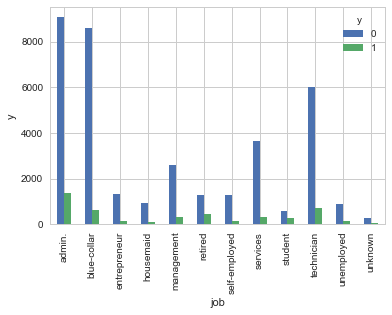

In [12]:
%matplotlib inline
pd.crosstab(df.job,df.y).plot(kind='bar')
plt.title('')
plt.xlabel('job')
plt.ylabel('y')
plt.savefig("job vs subscription")

<b>Looks like Job has some effect on the subscription rate</b>

In [13]:
table=pd.crosstab(df.marital,df.y)

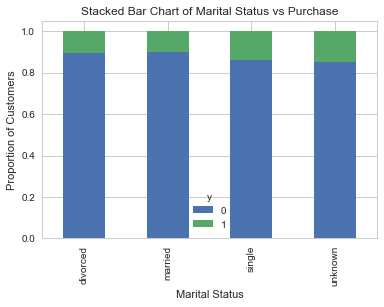

In [14]:
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')


<b>Well Marital status doesnt look promising here.</b>

In [15]:
print(table)

y             0     1
marital              
divorced   4136   476
married   22396  2532
single     9948  1620
unknown      68    12


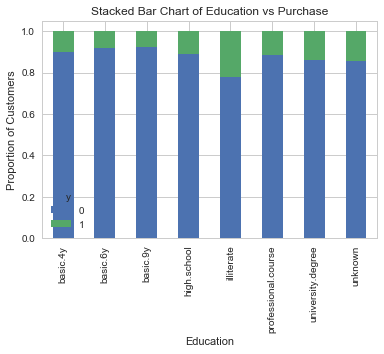

In [17]:
table=pd.crosstab(df.education,df.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

<b>Marital status is quite promising. We will be further exploring this feature</b>

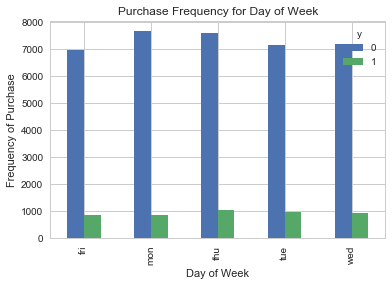

In [18]:
pd.crosstab(df.day_of_week,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

<b> Theres some effect of the Day of the week however we cannot see any significant difference </b>

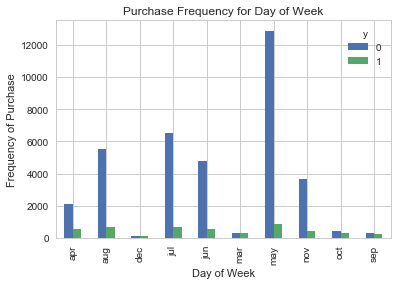

In [19]:
pd.crosstab(df.month,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

<b>Months are quite promising . It seems during summer season there were more subscription</b>

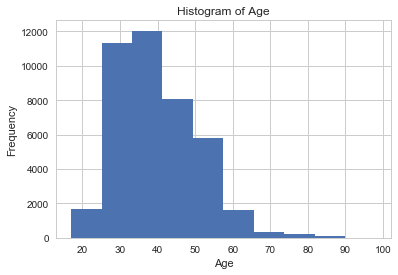

In [21]:
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

<b>From the above graph we can see that age do have significant role to play in the Subscription conversion.</b>

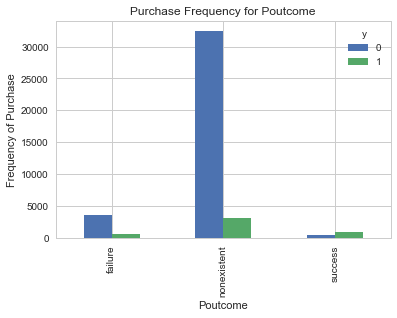

In [23]:
pd.crosstab(df.poutcome,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

<b>Exploring the Categorical features and decising on strategy to convert them into numerical values</b>

In [31]:
print(df.job.unique())

['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'housemaid' 'unemployed' 'entrepreneur' 'self-employed' 'unknown'
 'student']


In [33]:
print(df.marital.unique())

['married' 'single' 'divorced' 'unknown']


In [34]:
print(df.education.unique())

['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']


In [35]:
print(df.default.unique())

['unknown' 'no' 'yes']


In [36]:
print(df.housing.unique())

['yes' 'no' 'unknown']


In [37]:
print(df.loan.unique())

['no' 'yes' 'unknown']


In [38]:
print(df.contact.unique())

['cellular' 'telephone']


In [39]:
print(df.month.unique())

['aug' 'nov' 'jun' 'apr' 'jul' 'may' 'oct' 'mar' 'sep' 'dec']


In [40]:
print(df.day_of_week.unique())

['thu' 'fri' 'tue' 'mon' 'wed']


In [41]:
print(df.poutcome.unique())

['nonexistent' 'success' 'failure']


In [42]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [117]:
data=df.copy()

Tip: in Python, it's a good practice to typecast categorical features to a category dtype because they make the operations on such columns much faster than the object dtype. You can do the typecasting by using .astype() method on your columns like shown below:

In [118]:
data.marital=data.marital.astype('category').cat.codes
print(data.head(5))

   age          job  marital          education  default housing loan  \
0   44  blue-collar        1           basic.4y  unknown     yes   no   
1   53   technician        1            unknown       no      no   no   
2   28   management        2  university.degree       no     yes   no   
3   39     services        1        high.school       no      no   no   
4   55      retired        1           basic.4y       no     yes   no   

    contact month day_of_week ...  campaign  pdays  previous     poutcome  \
0  cellular   aug         thu ...         1    999         0  nonexistent   
1  cellular   nov         fri ...         1    999         0  nonexistent   
2  cellular   jun         thu ...         3      6         2      success   
3  cellular   apr         fri ...         2    999         0  nonexistent   
4  cellular   aug         fri ...         1      3         1      success   

  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
0          1.4         

In [119]:
data.marital.unique()

array([1, 2, 0, 3])

In [120]:
data[['default','housing','loan','contact','day_of_the_week','poutcome']]=data[['default','housing','loan','contact','day_of_week','poutcome']].astype('category')

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
age                41188 non-null int64
job                41188 non-null object
marital            41188 non-null int8
education          41188 non-null object
default            41188 non-null category
housing            41188 non-null category
loan               41188 non-null category
contact            41188 non-null category
month              41188 non-null object
day_of_week        41188 non-null object
duration           41188 non-null int64
campaign           41188 non-null int64
pdays              41188 non-null int64
previous           41188 non-null int64
poutcome           41188 non-null category
emp_var_rate       41188 non-null float64
cons_price_idx     41188 non-null float64
cons_conf_idx      41188 non-null float64
euribor3m          41188 non-null float64
nr_employed        41188 non-null float64
y                  41188 non-null int64
day_of_the_week    4118

In [122]:
data.default=data.default.cat.codes

In [123]:
data.dtypes

age                   int64
job                  object
marital                int8
education            object
default                int8
housing            category
loan               category
contact            category
month                object
day_of_week          object
duration              int64
campaign              int64
pdays                 int64
previous              int64
poutcome           category
emp_var_rate        float64
cons_price_idx      float64
cons_conf_idx       float64
euribor3m           float64
nr_employed         float64
y                     int64
day_of_the_week    category
dtype: object

In [124]:
data.day_of_week=data.day_of_week.astype('category')
cols=['housing','loan','contact','day_of_week','poutcome']
for x in cols:
    data[x]=data[x].cat.codes
# data['housing']=data['housing'].cat.codes
# data.loan=data.loan.cat.codes
# data.contact=data.contact.cat.codes
#data.poutcome=data.poutcome.cat.codes


In [125]:
data.day_of_week=data.day_of_week.astype('category').cat.codes
#data.drop('day_of_the_week',axis=1)


In [126]:
data.job=data.job.astype('category').cat.codes
data.education=data.education.astype('category').cat.codes
data.month=data.month.astype('category').cat.codes

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
age                41188 non-null int64
job                41188 non-null int8
marital            41188 non-null int8
education          41188 non-null int8
default            41188 non-null int8
housing            41188 non-null int8
loan               41188 non-null int8
contact            41188 non-null int8
month              41188 non-null int8
day_of_week        41188 non-null int8
duration           41188 non-null int64
campaign           41188 non-null int64
pdays              41188 non-null int64
previous           41188 non-null int64
poutcome           41188 non-null int8
emp_var_rate       41188 non-null float64
cons_price_idx     41188 non-null float64
cons_conf_idx      41188 non-null float64
euribor3m          41188 non-null float64
nr_employed        41188 non-null float64
y                  41188 non-null int64
day_of_the_week    41188 non-null category
dtypes: 

<b>Succesfully converting categorical features with numerical values </b>

In [128]:
data.drop(columns=['day_of_the_week'],inplace=True)

<b>Finding the correlation between the features, using pearson method of correlation</b>

In [129]:
corr=data.corr(method='pearson')

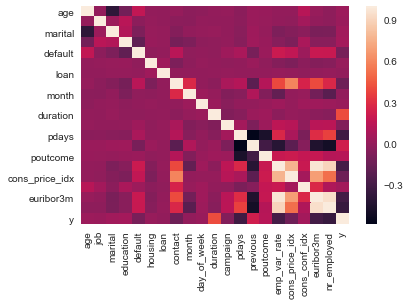

In [130]:
sns.heatmap(corr)

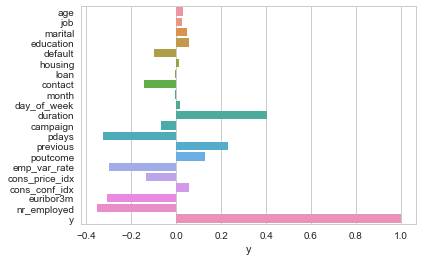

In [131]:
sns.barplot(x=corr.y,y=corr.columns)

<b>RFE (Recursive feature elimination/selection)</b>

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null int8
marital           41188 non-null int8
education         41188 non-null int8
default           41188 non-null int8
housing           41188 non-null int8
loan              41188 non-null int8
contact           41188 non-null int8
month             41188 non-null int8
day_of_week       41188 non-null int8
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null int8
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), int8(10)
memory usage: 3.8 MB


<b>Selecting columns with positive correlations</b>

In [143]:
#cols=['age','job',' marital',' education',' default ','housing ','loan',' contact ',
#'month',' day_of_week','duration','campaign','previous','poutcome',' cons_conf_idx']
#X=data[cols]
X = data.iloc[:,[0,1,2,3,4,5,6,7,9,10,11,13,14,15,18,19]]
y = data.iloc[:,-1]

In [135]:
# X = data.loc[:, data.columns != 'y']
# y = data.loc[:, data.columns == 'y']

In [144]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
rfe=RFE(logreg,20)
rfe=rfe.fit(X,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


<h3>Logistic Regression Model Fitting</h3>

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [146]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [147]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10727   254]
 [  870   506]]


<b>The result is telling us that we have 10727+506 correct predictions and 254+870 incorrect predictions.</b>

In [148]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.92      0.98      0.95     10981
          1       0.67      0.37      0.47      1376

avg / total       0.90      0.91      0.90     12357



<h2>Interpretation: Of the entire test set, 90% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 91% of the customer’s preferred term deposits that were promoted.
</h2>

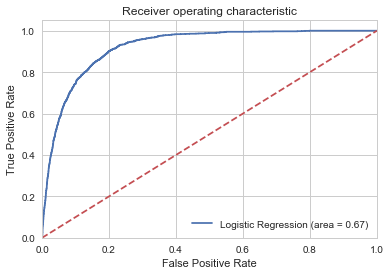

In [150]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<h3>The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).</h3>